In [1]:
import pandas as pd

In [3]:
audible_csv = "audible_uncleaned.csv"
df = pd.read_csv(audible_csv)

In [4]:
print("Info:")
print(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87489 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   name         87489 non-null  object
 1   author       87489 non-null  object
 2   narrator     87489 non-null  object
 3   time         87489 non-null  object
 4   releasedate  87489 non-null  object
 5   language     87489 non-null  object
 6   stars        87489 non-null  object
 7   price        87489 non-null  object
dtypes: object(8)
memory usage: 5.3+ MB
None


In [5]:
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,2 hrs and 20 mins,04-08-08,English,5 out of 5 stars34 ratings,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 8 mins,01-05-18,English,4.5 out of 5 stars41 ratings,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,2 hrs and 3 mins,06-11-20,English,4.5 out of 5 stars38 ratings,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,11 hrs and 16 mins,05-10-21,English,4.5 out of 5 stars12 ratings,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,10 hrs,13-01-10,English,4.5 out of 5 stars181 ratings,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,10 hrs and 35 mins,30-10-18,English,5 out of 5 stars72 ratings,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,2 hrs and 23 mins,25-11-14,English,5 out of 5 stars11 ratings,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,12 hrs and 32 mins,02-05-17,English,5 out of 5 stars50 ratings,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,10 hrs and 56 mins,02-05-17,English,5 out of 5 stars5 ratings,"1,256.00"
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,13 hrs and 22 mins,24-09-19,English,5 out of 5 stars58 ratings,820.00


In [6]:
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")


Duplicate rows: 0


In [7]:
df['releasedate'] = pd.to_datetime(df['releasedate'], errors='coerce')

C:\Users\User\AppData\Local\Temp\ipykernel_21736\925497503.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['releasedate'] = pd.to_datetime(df['releasedate'], errors='coerce')


In [8]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['stars'] = pd.to_numeric(df['stars'], errors='coerce')

In [9]:
print(df.dtypes)

name                   object
author                 object
narrator               object
time                   object
releasedate    datetime64[ns]
language               object
stars                 float64
price                 float64
dtype: object


In [10]:
df['releasedate'].dropna().sample(10)  # Sample 10 random non-null values

81002   2013-02-23
50615   2018-07-11
86236   2020-06-10
34855   2021-07-14
82762   2021-05-25
82838   2022-10-02
62980   2018-10-16
67459   2015-09-11
62336   2019-07-06
8866    2021-09-23
Name: releasedate, dtype: datetime64[ns]

In [11]:
df['time'].unique()[:20]  # Show first 20 unique values

array(['2 hrs and 20 mins', '13 hrs and 8 mins', '2 hrs and 3 mins',
       '11 hrs and 16 mins', '10 hrs', '10 hrs and 35 mins',
       '2 hrs and 23 mins', '12 hrs and 32 mins', '10 hrs and 56 mins',
       '13 hrs and 22 mins', '8 hrs and 48 mins', '5 hrs and 23 mins',
       '6 hrs and 1 min', '12 hrs and 58 mins', '11 hrs and 55 mins',
       '2 hrs and 25 mins', '5 hrs and 4 mins', '14 hrs and 41 mins',
       '10 hrs and 18 mins', '16 hrs and 42 mins'], dtype=object)

In [ ]:
import re

def convert_time_to_minutes(time_str):
    
    if pd.isna(time_str):  
        return None
    
    # Extract hours and minutes using regex
    hours = re.search(r"(\d+) hr", time_str)
    minutes = re.search(r"(\d+) min", time_str)
    
    # Convert to total minutes
    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60  
    if minutes:
        total_minutes += int(minutes.group(1))  
    
    return total_minutes

df['time'] = df['time'].apply(convert_time_to_minutes)

df['time'] = pd.to_numeric(df['time'], errors='coerce')

print(df[['time']].head(10)) 


   time
0   140
1   788
2   123
3   676
4   600
5   635
6   143
7   752
8   656
9   802


In [ ]:
text_columns = ['name', 'author', 'narrator', 'language']
df[text_columns] = df[text_columns].apply(lambda x: x.str.strip())

print(df['language'].value_counts())  


language
English             61884
german               8295
spanish              3496
japanese             3167
italian              2694
french               2386
russian              1804
danish                935
portuguese            526
swedish               515
Hindi                 436
polish                224
finnish               197
dutch                 190
tamil                 161
catalan               153
mandarin_chinese       97
icelandic              52
romanian               50
hungarian              36
urdu                   34
afrikaans              28
czech                  23
turkish                20
greek                  18
arabic                 16
norwegian              16
galician               10
bulgarian               9
slovene                 4
korean                  4
hebrew                  2
basque                  2
telugu                  2
lithuanian              2
ukrainian               1
Name: count, dtype: int64


In [14]:
duplicate_rows = df.duplicated().sum()
print(f"Duplicate rows: {duplicate_rows}")

Duplicate rows: 41


In [ ]:
df = df.drop_duplicates()

In [ ]:
print(f"Remaining duplicate rows: {df.duplicated().sum()}")

Remaining duplicate rows: 0


In [18]:
print("Info:")
print(df.info())

Info:
<class 'pandas.core.frame.DataFrame'>
Index: 87448 entries, 0 to 87488
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   name         87448 non-null  object        
 1   author       87448 non-null  object        
 2   narrator     87448 non-null  object        
 3   time         87448 non-null  int64         
 4   releasedate  87448 non-null  datetime64[ns]
 5   language     87448 non-null  object        
 6   stars        0 non-null      float64       
 7   price        77982 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


In [19]:
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,140,2008-04-08,English,NaN,468.0
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,788,2018-01-05,English,NaN,820.0
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,123,2020-06-11,English,NaN,410.0
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,676,2021-05-10,English,NaN,615.0
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,600,2010-01-13,English,NaN,820.0
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,635,2018-10-30,English,NaN,656.0
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,143,2014-11-25,English,NaN,233.0
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,752,2017-02-05,English,NaN,820.0
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,656,2017-02-05,English,NaN,NaN
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,802,2019-09-24,English,NaN,820.0


In [ ]:

df_original = pd.read_csv("audible_uncleaned.csv")  
print(df_original['stars'].unique()[:20]) 


['5 out of 5 stars34 ratings' '4.5 out of 5 stars41 ratings'
 '4.5 out of 5 stars38 ratings' '4.5 out of 5 stars12 ratings'
 '4.5 out of 5 stars181 ratings' '5 out of 5 stars72 ratings'
 '5 out of 5 stars11 ratings' '5 out of 5 stars50 ratings'
 '5 out of 5 stars5 ratings' '5 out of 5 stars58 ratings'
 '4.5 out of 5 stars130 ratings' '5 out of 5 stars6 ratings'
 '5 out of 5 stars7 ratings' '5 out of 5 stars41 ratings'
 '4 out of 5 stars2 ratings' '4.5 out of 5 stars33 ratings'
 '5 out of 5 stars20 ratings' '5 out of 5 stars13 ratings'
 '5 out of 5 stars79 ratings' '4.5 out of 5 stars47 ratings']


In [ ]:
import re

def extract_rating(star_str):
    if pd.isna(star_str)
        return None
    match = re.search(r"(\d+(\.\d+)?) out of 5 stars", star_str)
    return float(match.group(1)) if match else None

df_original['stars'] = df_original['stars'].apply(extract_rating)

df_original['stars'] = pd.to_numeric(df_original['stars'], errors='coerce')

print(df_original[['stars']].head(10))  # Display first 10 rows


   stars
0    5.0
1    4.5
2    4.5
3    4.5
4    4.5
5    5.0
6    5.0
7    5.0
8    5.0
9    5.0


In [22]:
df['stars'] = df_original['stars']


In [ ]:
print(df[['stars']].info())  
print(df[['stars']].head(10)) 

<class 'pandas.core.frame.DataFrame'>
Index: 87448 entries, 0 to 87488
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   stars   15032 non-null  float64
dtypes: float64(1)
memory usage: 1.3 MB
None
   stars
0    5.0
1    4.5
2    4.5
3    4.5
4    4.5
5    5.0
6    5.0
7    5.0
8    5.0
9    5.0


In [34]:
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Writtenby:GeronimoStilton,Narratedby:BillLobely,140,2008-04-08,English,5.0,468.00
1,The Burning Maze,Writtenby:RickRiordan,Narratedby:RobbieDaymond,788,2018-01-05,English,4.5,820.00
2,The Deep End,Writtenby:JeffKinney,Narratedby:DanRussell,123,2020-06-11,English,4.5,410.00
3,Daughter of the Deep,Writtenby:RickRiordan,Narratedby:SoneelaNankani,676,2021-05-10,English,4.5,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Writtenby:RickRiordan,Narratedby:JesseBernstein,600,2010-01-13,English,4.5,820.00
5,The Hunger Games: Special Edition,Writtenby:SuzanneCollins,Narratedby:TatianaMaslany,635,2018-10-30,English,5.0,656.00
6,Quest for the Diamond Sword,Writtenby:WinterMorgan,Narratedby:LukeDaniels,143,2014-11-25,English,5.0,233.00
7,The Dark Prophecy,Writtenby:RickRiordan,Narratedby:RobbieDaymond,752,2017-02-05,English,5.0,820.00
8,Merlin Mission Collection,Writtenby:MaryPopeOsborne,Narratedby:MaryPopeOsborne,656,2017-02-05,English,5.0,1256.00
9,The Tyrant’s Tomb,Writtenby:RickRiordan,Narratedby:RobbieDaymond,802,2019-09-24,English,5.0,820.00


In [28]:
df_original['price'] = df_original['price'].str.replace(',', '', regex=True) 

In [ ]:
print(df_original[['price']].head(10)) 

     price
0   468.00
1   820.00
2   410.00
3   615.00
4   820.00
5   656.00
6   233.00
7   820.00
8  1256.00
9   820.00


In [30]:
df['price'] = df_original['price']

In [ ]:
print(df['price'].isnull().sum())  
print(df[['price']].head(10))  


0
     price
0   468.00
1   820.00
2   410.00
3   615.00
4   820.00
5   656.00
6   233.00
7   820.00
8  1256.00
9   820.00


In [36]:
df['author'] = df['author'].str.replace('Writtenby:', '', regex=True).str.strip()

In [46]:
df.head(100)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,5.0,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,4.5,820.00
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,4.5,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,4.5,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,4.5,820.00
...,...,...,...,...,...,...,...,...
95,An Explorer's Guide to the Nether,WinterMorgan,SummerMcCusker,110,2016-03-30,English,5.0,233.00
96,The Midnight Gang,DavidWalliams,"DavidWalliams,PeterSerafinowicz,MorwennaBanks,",369,2016-11-15,English,4.5,322.00
97,As the Falcon Flies,FranklinW.Dixon,AdamVerner,188,2022-04-01,English,NaN,305.00
98,The Squad of Lucky Landing: An Unofficial Fort...,DevinHunter,RamonDeOcampo,131,2018-10-30,English,5.0,585.00


In [38]:
df['narrator'] = df['narrator'].str.replace('Narratedby:', '', regex=True).str.strip()

In [ ]:
df_sample = df.sample(n=30, random_state=42) 
df_sample

,name,author,narrator,time,releasedate,language,stars,price
60339,White Night,JimButcher,JamesMarsters,852,2008-12-28,English,4.5,1206.00
32302,"Sleep, Interrupted",StevenY.ParkMD,AdamLofbomm,356,2019-03-19,English,NaN,586.00
56297,Stars,KathrynHarvey,LauraJennings,1185,2015-09-21,English,NaN,937.00
68362,Er der et liv efter døden?,DagmarAndreasen,JonnaHjerl,259,2020-06-17,danish,NaN,233.00
9920,The Beginning,M.J.Thomas,AdamVerner,83,2018-06-09,English,NaN,586.00
36132,Homecoming,ThemaBryant,"ThemaBryant,InaKing",573,2022-03-15,English,NaN,1005.00
80103,Outlanders 1-3 Bundle (Dramatized Adaptation),JamesAxler,"CaseyJones,ChristopherGraybill,DavidCoyne,",1474,2021-11-08,English,NaN,1289.00
33625,Empieza por los zapatos [Start with Shoes],AndreaAmoretti,RaquelRomeroEscribá,193,2018-08-13,spanish,NaN,537.00
34043,Food Rules,MichaelPollan,MichaelPollan,80,2020-04-14,English,5.0,502.00
57832,Management in 10 Words,TerryLeahy,RupertHollidayEvans,524,2012-08-06,English,NaN,683.00


In [ ]:
df_display = df.copy()
df_display['stars'] = df_display['stars'].fillna('Not Rated')

In [45]:
df_display.head(100)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,GeronimoStilton,BillLobely,140,2008-04-08,English,5.0,468.00
1,The Burning Maze,RickRiordan,RobbieDaymond,788,2018-01-05,English,4.5,820.00
2,The Deep End,JeffKinney,DanRussell,123,2020-06-11,English,4.5,410.00
3,Daughter of the Deep,RickRiordan,SoneelaNankani,676,2021-05-10,English,4.5,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",RickRiordan,JesseBernstein,600,2010-01-13,English,4.5,820.00
...,...,...,...,...,...,...,...,...
95,An Explorer's Guide to the Nether,WinterMorgan,SummerMcCusker,110,2016-03-30,English,5.0,233.00
96,The Midnight Gang,DavidWalliams,"DavidWalliams,PeterSerafinowicz,MorwennaBanks,",369,2016-11-15,English,4.5,322.00
97,As the Falcon Flies,FranklinW.Dixon,AdamVerner,188,2022-04-01,English,Not Rated,305.00
98,The Squad of Lucky Landing: An Unofficial Fort...,DevinHunter,RamonDeOcampo,131,2018-10-30,English,5.0,585.00


In [ ]:
df_sample = df_display.sample(n=30, random_state=42) 
df_sample

,name,author,narrator,time,releasedate,language,stars,price
60339,White Night,JimButcher,JamesMarsters,852,2008-12-28,English,4.5,1206.00
32302,"Sleep, Interrupted",StevenY.ParkMD,AdamLofbomm,356,2019-03-19,English,Not Rated,586.00
56297,Stars,KathrynHarvey,LauraJennings,1185,2015-09-21,English,Not Rated,937.00
68362,Er der et liv efter døden?,DagmarAndreasen,JonnaHjerl,259,2020-06-17,danish,Not Rated,233.00
9920,The Beginning,M.J.Thomas,AdamVerner,83,2018-06-09,English,Not Rated,586.00
36132,Homecoming,ThemaBryant,"ThemaBryant,InaKing",573,2022-03-15,English,Not Rated,1005.00
80103,Outlanders 1-3 Bundle (Dramatized Adaptation),JamesAxler,"CaseyJones,ChristopherGraybill,DavidCoyne,",1474,2021-11-08,English,Not Rated,1289.00
33625,Empieza por los zapatos [Start with Shoes],AndreaAmoretti,RaquelRomeroEscribá,193,2018-08-13,spanish,Not Rated,537.00
34043,Food Rules,MichaelPollan,MichaelPollan,80,2020-04-14,English,5.0,502.00
57832,Management in 10 Words,TerryLeahy,RupertHollidayEvans,524,2012-08-06,English,Not Rated,683.00


In [ ]:
print(df.describe())

print(df.describe(include=['object']))


               time                    releasedate         stars
count  87448.000000                          87448  15032.000000
mean     417.461120  2018-06-22 05:06:46.733144320      4.456692
min        1.000000            1998-12-27 00:00:00      1.000000
25%      142.000000            2016-08-30 00:00:00      4.000000
50%      386.000000            2020-01-30 00:00:00      4.500000
75%      584.000000            2021-08-04 00:00:00      5.000000
max     8595.000000            2025-11-14 00:00:00      5.000000
std      364.568892                            NaN      0.724754
                  name    author   narrator language   price
count            87448     87448      87448    87448   87448
unique           82764     48374      29717       36    1011
top     The Art of War  矢島雅弘,石橋遊  anonymous  English  586.00
freq                20       874       1034    61844    5532


In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

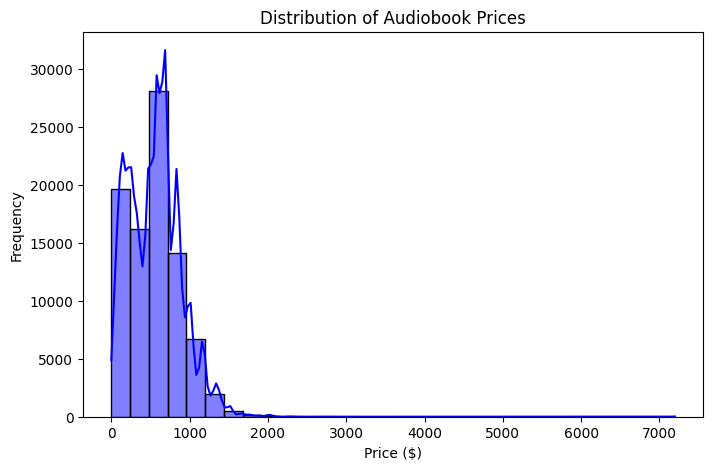

In [106]:
plt.figure(figsize=(8,5))
sns.histplot(df['price'], bins=30, kde=True, color='blue')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.title('Distribution of Audiobook Prices')
plt.show()

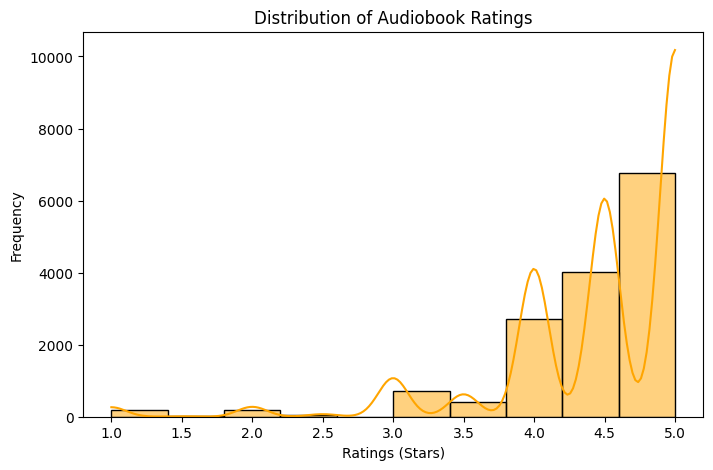

In [60]:
plt.figure(figsize=(8,5))
sns.histplot(df['stars'], bins=10, kde=True, color='orange')
plt.xlabel('Ratings (Stars)')
plt.ylabel('Frequency')
plt.title('Distribution of Audiobook Ratings')
plt.show()


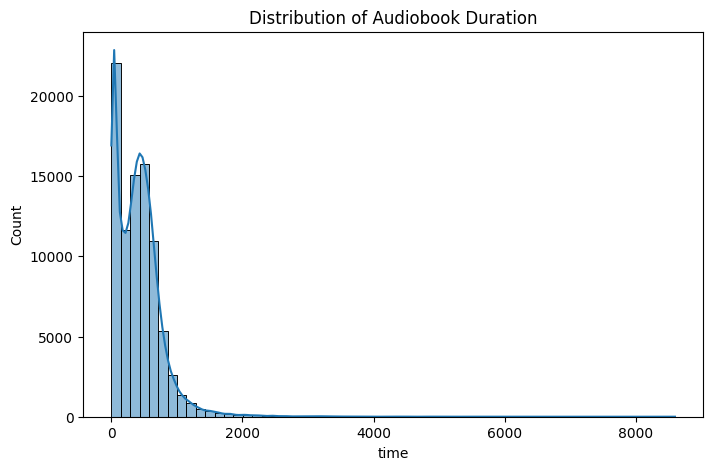

In [96]:
plt.figure(figsize=(8,5))
sns.histplot(data= df, x= 'time', bins=60,kde=True )
plt.title('Distribution of Audiobook Duration')
plt.show()

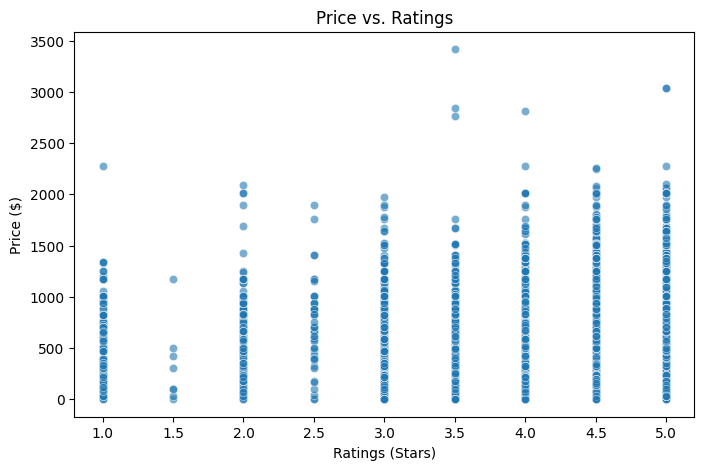

In [108]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['stars'], y=df['price'], alpha=0.6)
plt.xlabel('Ratings (Stars)')
plt.ylabel('Price ($)')
plt.title('Price vs. Ratings')
plt.show()


In [76]:
unrated_books = df['stars'].isna().sum()
print(f"Unrated Books: {unrated_books}")


Unrated Books: 72416


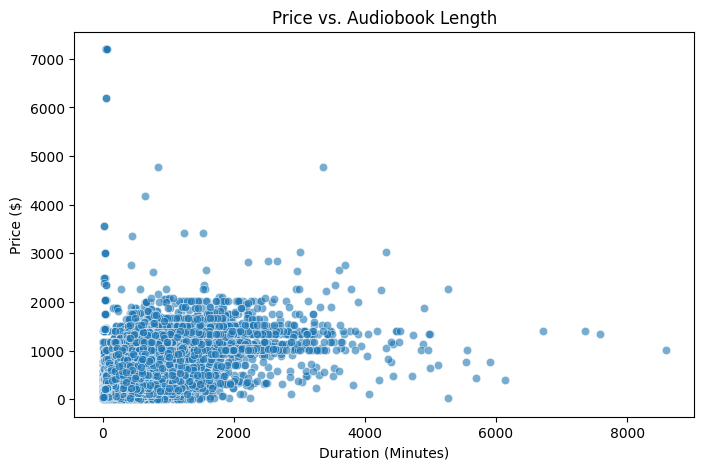

In [109]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['time'], y=df['price'], alpha=0.6)
plt.xlabel('Duration (Minutes)')
plt.ylabel('Price ($)')
plt.title('Price vs. Audiobook Length')
plt.show()


C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 30690 (\N{CJK UNIFIED IDEOGRAPH-77E2}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 23798 (\N{CJK UNIFIED IDEOGRAPH-5CF6}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38597 (\N{CJK UNIFIED IDEOGRAPH-96C5}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 24344 (\N{CJK UNIFIED IDEOGRAPH-5F18}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\User\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170:

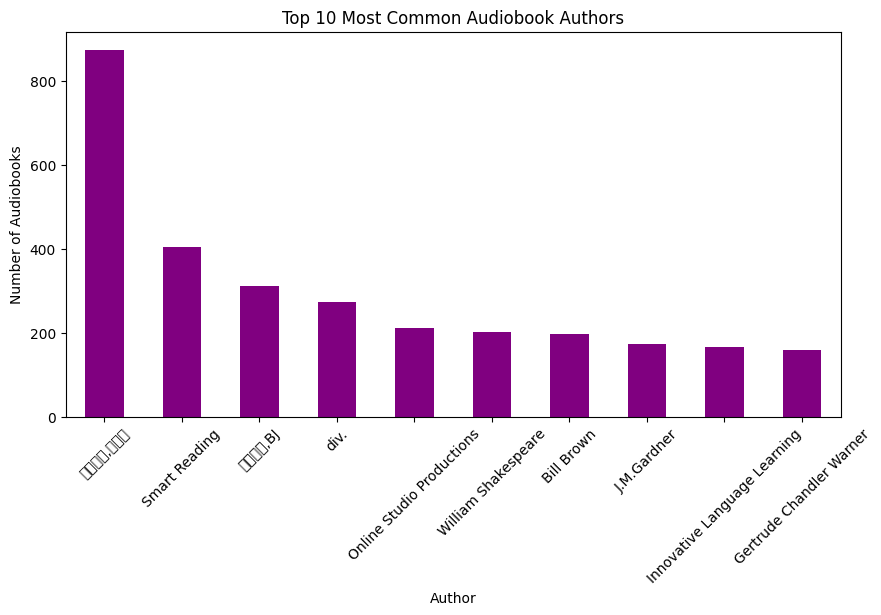

In [87]:
plt.figure(figsize=(10,5))
df['author'].value_counts().nlargest(10).plot(kind='bar', color='purple')
plt.xlabel('Author')
plt.ylabel('Number of Audiobooks')
plt.title('Top 10 Most Common Audiobook Authors')
plt.xticks(rotation=45)
plt.show()


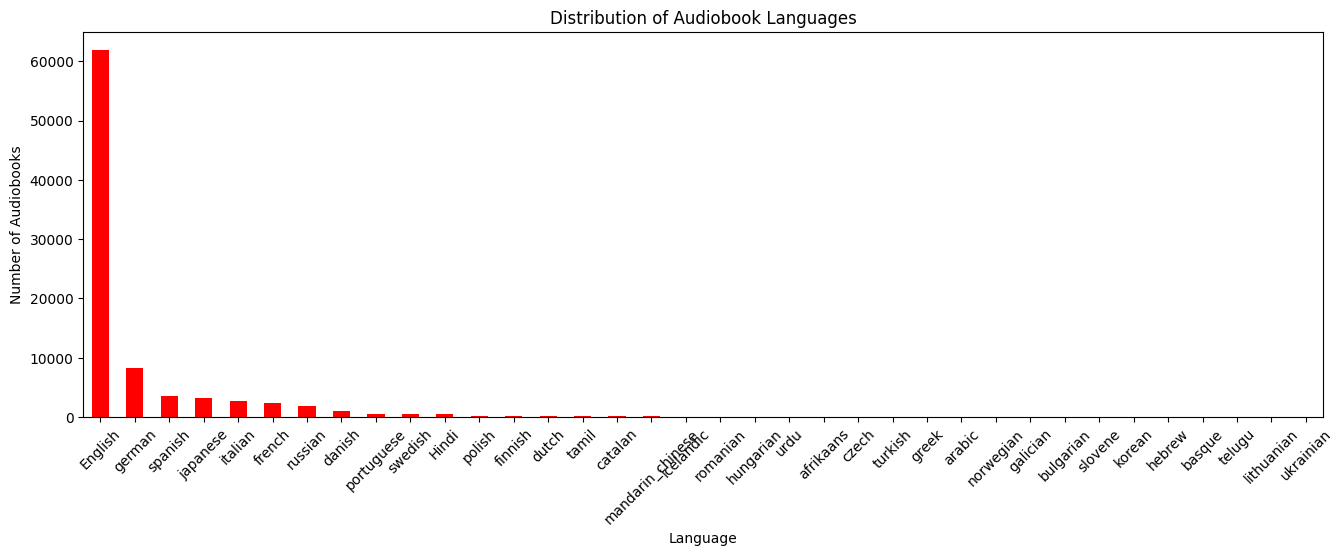

In [66]:
plt.figure(figsize=(16,5))
df['language'].value_counts().plot(kind='bar', color='red')
plt.xlabel('Language')
plt.ylabel('Number of Audiobooks')
plt.title('Distribution of Audiobook Languages')
plt.xticks(rotation=45)
plt.show()


In [88]:
df['author'].value_counts().head(10)


author
矢島雅弘,石橋遊                        874
Smart Reading                   405
中西貴之,BJ                         311
div.                            274
Online Studio Productions       212
William Shakespeare             201
Bill Brown                      198
J.M.Gardner                     174
Innovative Language Learning    167
Gertrude Chandler Warner        160
Name: count, dtype: int64

In [86]:
df.head(10)

,name,author,narrator,time,releasedate,language,stars,price
0,Geronimo Stilton #11 & #12,Geronimo Stilton,Bill Lobely,140,2008-04-08,English,5.0,468.00
1,The Burning Maze,Rick Riordan,Robbie Daymond,788,2018-01-05,English,4.5,820.00
2,The Deep End,Jeff Kinney,Dan Russell,123,2020-06-11,English,4.5,410.00
3,Daughter of the Deep,Rick Riordan,Soneela Nankani,676,2021-05-10,English,4.5,615.00
4,"The Lightning Thief: Percy Jackson, Book 1",Rick Riordan,Jesse Bernstein,600,2010-01-13,English,4.5,820.00
5,The Hunger Games: Special Edition,Suzanne Collins,Tatiana Maslany,635,2018-10-30,English,5.0,656.00
6,Quest for the Diamond Sword,Winter Morgan,Luke Daniels,143,2014-11-25,English,5.0,233.00
7,The Dark Prophecy,Rick Riordan,Robbie Daymond,752,2017-02-05,English,5.0,820.00
8,Merlin Mission Collection,Mary Pope Osborne,Mary Pope Osborne,656,2017-02-05,English,5.0,1256.00
9,The Tyrant’s Tomb,Rick Riordan,Robbie Daymond,802,2019-09-24,English,5.0,820.00


In [83]:
def split_author_name(name):
    return re.sub(r'([a-z])([A-Z])', r'\1 \2', name)

df['author'] = df['author'].apply(split_author_name)


In [85]:
def split_author_name(name):
    return re.sub(r'([a-z])([A-Z])', r'\1 \2', name)

df['narrator'] = df['narrator'].apply(split_author_name)

In [89]:
df['narrator'].value_counts().head(10)

narrator
anonymous                   1034
矢島雅弘,石橋遊                     874
Intuitive                    465
uncredited                   326
中西貴之,BJ                      311
Book Buddy Digital Media     260
div.                         230
ДмитрийЕвстратов             221
Bill Brown                   198
Sean Pratt                   172
Name: count, dtype: int64

In [105]:
df['price'] = df['price'].replace('Free', 0.00).astype(float)


In [ ]:
df_sample1 = df.sample(n=30, random_state=43)  

,name,author,narrator,time,releasedate,language,stars,price
82947,Til min bedste veninde i verden,Camilla Wandahl,Pernille Geertsen,77,2021-02-12,Danish,NaN,233.0
74376,A SEAL’s Triumph,Cora Seton,Noah Michael Levine,549,2021-05-25,English,NaN,469.0
48618,An Anthology of Classic Stories,"Guyde Maupassant,D.H.Lawrence,Edgar Allan Poe,",Cathy Dobson,1233,2013-11-14,English,NaN,1898.0
82876,Ansia,Tracy Wolff,"Sonia Esteban,Mario Otero",1759,2022-01-26,Spanish,NaN,1343.0
17046,I'm with the Band,Pamela Des Barres,Pamela Des Barres,669,2019-07-18,English,NaN,721.0
12395,Itämaista rakkautta,N.N.,Leo Niemi,49,2020-01-20,Finnish,NaN,233.0
69751,Der Lichtarbeiter in uns,Katja Barnasiow,Katja Barnasiow,222,2021-12-30,German,NaN,468.0
26696,Familjetvist bakom trippelmord i Sørum,Div.,Sofia Watts,72,2020-05-03,Swedish,NaN,65.0
50576,Kali Ka Uday,Anand Neelakantan,Nitin Sharma,1361,2019-10-10,Hindi,4.5,284.0
34622,Dr. Sebi for Muscle Growth Made Simple,Jose Constanza,Judah Paul Andrews,20,2020-07-27,English,NaN,132.0


In [113]:
df['language'] = df['language'].str.capitalize()
